In [1]:
#Python libraries
import numpy as np
import scipy.linalg as la
from numpy.linalg import *

In [2]:
print("\nStationary Iterative Methods with Momentum to accelerate the stationary iterations for solving linear systems\n")

print("Enter the details for Matrix 'A': - ")
print("")
R = int(input("Enter the number of rows for Matrix 'A':")) 
C = int(input("Enter the number of columns for Matrix 'A':"))
print("Enter the entries in a single line (separated by space)\nrow wise for Matrix 'A': ")
entries = list(map(float, input().split()))

'''
A: - [[ 8.  0. -4.]
 [ 0.  4.  0.]
 [-7.  0.  5.]]
'''

A = np.array(entries).reshape(R, C)
print("")

print("\nA: -", A,"\n")

print("Enter the details for Matrix 'b': - ")
print("")
print("Enter the entries in a single line (separated by space)\nrow wise for Matrix 'b': ")
entries = list(map(float, input().split()))
b = np.array(entries).reshape(R)
#b: - [1. 2. 3.] 
print("b: -", b,"\n")


Stationary Iterative Methods with Momentum to accelerate the stationary iterations for solving linear systems

Enter the details for Matrix 'A': - 

Enter the number of rows for Matrix 'A':3
Enter the number of columns for Matrix 'A':3
Enter the entries in a single line (separated by space)
row wise for Matrix 'A': 
8 0 -4 0 4 0 -7 0 5


A: - [[ 8.  0. -4.]
 [ 0.  4.  0.]
 [-7.  0.  5.]] 

Enter the details for Matrix 'b': - 

Enter the entries in a single line (separated by space)
row wise for Matrix 'b': 
1 2 3
b: - [1. 2. 3.] 



In [3]:
I = np.identity(C)
print("")
print("I", I,"\n")

print("The Matrix 'D': - ")

D = np.diag(A)
D = D*I
print("D: -", D)

Dinv = np.linalg.inv(D)
print("")
print("Dinv: -", Dinv)

T = I - np.dot(Dinv, A)
print("")
print("T: -", T)

print("\n From Theorem 3.3, we understand that spectral radius ρ(H) of a square matrix or a bounded linear operator")
print("is the largest absolute value of its eigenvalues\n")

eigvals, eigvecs = la.eig(T)
eigvals = eigvals.real
print("")
print("Eigen Values of 'T': -", eigvals,"\n")
print("")
print("Eigen Vectors of 'T': -", eigvecs,"\n")

mu = float(input("Enter the 'mu' value to calculate Matrix 'H': - "))
print("mu = ",mu,"\n")
#mu =  0.5359
H = np.array([[(np.dot(mu, I))+T, -(np.dot(mu, I))], [I, 0]])
print("H: -", H)

print("\nFrom Theorem 3.6,")
print("Let -3 < α1 < α2 < …  < αm < 1 be all the eigenvalues of T, then the optimal")
print("momentum factor μ* which minimizes ρ(H) is,")
print("μ* = max {(1 – sqrt (1 – αm))2, (1 – sqrt (1 – α1))2} ∈ [0,1)      – (10)")
print("and")
print("min ρ(H) = sqrt(μ*)                                                – (11)")

alpha_max = max(eigvals)
alpha_min = min(eigvals)
print("")
print("alpha_max = ", alpha_max)
print("\nalpha_min = ", alpha_min)

mu_star = max(np.power((1 - np.sqrt(1 - alpha_max)),2), np.power((1 - np.sqrt(1 - alpha_min)),2))
print("")
print("mu_star = ", mu_star)

min_rho_H = np.sqrt(mu_star)
print("")


print("min_rho_H = ", min_rho_H)


I [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

The Matrix 'D': - 
D: - [[8. 0. 0.]
 [0. 4. 0.]
 [0. 0. 5.]]

Dinv: - [[0.125 0.    0.   ]
 [0.    0.25  0.   ]
 [0.    0.    0.2  ]]

T: - [[0.  0.  0.5]
 [0.  0.  0. ]
 [1.4 0.  0. ]]

 From Theorem 3.3, we understand that spectral radius ρ(H) of a square matrix or a bounded linear operator
is the largest absolute value of its eigenvalues


Eigen Values of 'T': - [ 0.83666003 -0.83666003  0.        ] 


Eigen Vectors of 'T': - [[ 0.51298918 -0.51298918  0.        ]
 [ 0.          0.          1.        ]
 [ 0.85839508  0.85839508  0.        ]] 

Enter the 'mu' value to calculate Matrix 'H': - 0.5359
mu =  0.5359 

H: - [[array([[0.5359, 0.    , 0.5   ],
       [0.    , 0.5359, 0.    ],
       [1.4   , 0.    , 0.5359]])
  array([[-0.5359, -0.    , -0.    ],
       [-0.    , -0.5359, -0.    ],
       [-0.    , -0.    , -0.5359]])]
 [array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]) 0]]

From Theorem 3.6,
Let -3 < α1 < α2 < …  < αm 

In [4]:
print("\nSolving the System by Jacobi Iterative Method Method\n")

def jacobi(A, b, x0, tol, maxiter=200):
    """
    Performs Jacobi iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.

    Terminates when the change in x is less than ``tol``, or
    if ``maxiter`` [default=200] iterations have been exceeded.

    Returns 3 variables:
        1.  x, the estimated solution
        2.  rel_diff, the relative difference between last 2
            iterations for x
        3.  k, the number of iterations used.  If k=maxiter,
            then the required tolerance was not met.
    """
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    k = 0
    rel_diff = tol * 2

    while (rel_diff > tol) and (k < maxiter):

        for i in range(0, n):
            subs = 0.0
            for j in range(0, n):
                if i != j:
                    subs += A[i,j] * x_prev[j]

            x[i] = (b[i] - subs ) / A[i,i]
            x[i] = x[i] + (mu_star*(x[i] - x[i-1]))
        k += 1

        rel_diff = norm(x - x_prev) / norm(x)
        #print(x, rel_diff)
        print("_____________________________________________________________________________________________________")
        print(k, "             ", x, "           ", rel_diff)
        x_prev = x.copy()
    print("_____________________________________________________________________________________________________\n")
    return x, rel_diff, k

# Main code starts here
# ---------------------
GL = 1.6
d = 0.8
#x0 = np.zeros(C);
print("Enter the details for Matrix 'x0' (guess) : - ")
print("")
#R = int(input("Enter the number of rows for Matrix 'x0' (guess) : -")) 
print("Enter the entries in a single line (separated by space)\nrow wise for Matrix 'x0' (guess) : - ")
entries = list(map(float, input().split()))
x0 = np.array(entries).reshape(R)
tol = 1E-9
maxiter = 200
print("_____________________________________________________________________________________________________\n")
print("Iterations      Solution of X                                  Real Difference")
x, rel_diff, k = jacobi(A, b, x0, tol, maxiter)
if k == maxiter:
    print(('WARNING: the Jacobi iterations did not '
           'converge within the required tolerance.'))
print(('The solution is %s; within a tolerance of %g, '
        'using %d iterations.' % (x, rel_diff, k)))
print('Solution error = norm(Ax-b) = %g' % \
            norm(np.dot(A,x)-b)) 
print('Condition number of A = %0.5f' % cond(A))
print('Solution from built-in functions = %s' % solve(A, b))
jacobi_error = (np.dot(A,x)-b)
jacobi_k = k
jacobi_soln = x


Solving the System by Jacobi Iterative Method Method

Enter the details for Matrix 'x0' (guess) : - 

Enter the entries in a single line (separated by space)
row wise for Matrix 'x0' (guess) : - 
1 1 1
_____________________________________________________________________________________________________

Iterations      Solution of X                                  Real Difference
_____________________________________________________________________________________________________
1               [0.49186256 0.50288906 2.53152404]             0.642624617987855
_____________________________________________________________________________________________________
2               [0.98575367 0.32754134 1.62981798]             0.5396368496945011
_____________________________________________________________________________________________________
3               [0.69496842 0.43077975 2.53009928]             0.357922351455527
_________________________________________________________________

In [5]:
la.solve(A,b)

array([1.41666667, 0.5       , 2.58333333])

In [6]:
print("Solving the System by Gauss-seidel Iterative Method Method")

def GS(A, b, x0, tol, maxiter=200):
    """
    Performs Gauss-seidel iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.

    Terminates when the change in x is less than ``tol``, or
    if ``maxiter`` [default=200] iterations have been exceeded.

    Returns 3 variables:
        1.  x, the estimated solution
        2.  rel_diff, the relative difference between last 2
            iterations for x
        3.  k, the number of iterations used.  If k=maxiter,
            then the required tolerance was not met.
    """
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    k = 0
    rel_diff = tol * 2

    while (rel_diff > tol) and (k < maxiter):

        for i in range(0, n):
            d = b[i]
            for j in range(0, n):
                if i != j:
                    d -= A[i][j] * x[j]

            x[i] = d / A[i][i]
            x[i] = x[i] + (mu_star*(x[i] - x[i-1]))
        k += 1

        rel_diff = norm(x - x_prev) / norm(x)
        #print(x, rel_diff)
        print("_____________________________________________________________________________________________________")
        print(k, "             ", x, "           ", rel_diff)
        x_prev = x.copy()
    print("_____________________________________________________________________________________________________\n")
    return x, rel_diff, k

# Main code starts here
# ---------------------
GL = 1.6
d = 0.8
#x0 = np.zeros(C);
print("Enter the details for Matrix 'x0' (guess) : - ")
print("")
#R = int(input("Enter the number of rows for Matrix 'x0' (guess) : -")) 
print("Enter the entries in a single line (separated by space)\nrow wise for Matrix 'x0' (guess) : - ")
entries = list(map(float, input().split()))
x0 = np.array(entries).reshape(R)
tol = 1E-9
maxiter = 200
print("_____________________________________________________________________________________________________\n")
print("Iterations      Solution of X                                  Real Difference")
x, rel_diff, k = GS(A, b, x0, tol, maxiter)
if k == maxiter:
    print(('WARNING: the Jacobi iterations did not '
           'converge within the required tolerance.'))
print(('The solution is %s; within a tolerance of %g, '
        'using %d iterations.' % (x, rel_diff, k)))
print('Solution error = norm(Ax-b) = %g' % \
            norm(np.dot(A,x)-b)) 
print('Condition number of A = %0.5f' % cond(A))
print('Solution from built-in functions = %s' % solve(A, b))
GS_error = (np.dot(A,x)-b)
GS_k = k
GS_soln = x

Solving the System by Gauss-seidel Iterative Method Method
Enter the details for Matrix 'x0' (guess) : - 

Enter the entries in a single line (separated by space)
row wise for Matrix 'x0' (guess) : - 
1 1 1
_____________________________________________________________________________________________________

Iterations      Solution of X                                  Real Difference
_____________________________________________________________________________________________________
1               [0.49186256 0.50288906 1.56756372]             0.5294281819928922
_____________________________________________________________________________________________________
2               [0.67489245 0.43790738 1.93785057]             0.19928014175280329
_____________________________________________________________________________________________________
3               [0.79430382 0.39551238 2.17943112]             0.11592842682043887
_________________________________________________________

In [7]:
print("Jacobi method Solution error: -", jacobi_error)
print("Gauss method Soulution error: -", GS_error)

Jacobi method Solution error: - [-3.38399938 -0.73625051  3.03531274]
Gauss method Soulution error: - [-3.38399939 -0.73625051  3.03531276]


In [8]:
import matplotlib.pyplot as plt

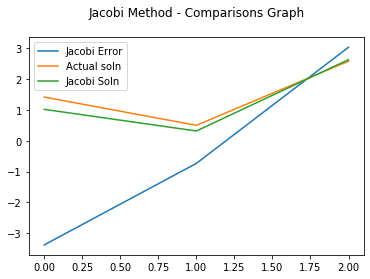

In [9]:
plt.title("Jacobi Method - Comparisons Graph\n")
plt.plot(jacobi_error, label='Jacobi Error')
plt.plot(solve(A,b), label='Actual soln')
plt.plot(jacobi_soln, label='Jacobi Soln')
plt.legend()

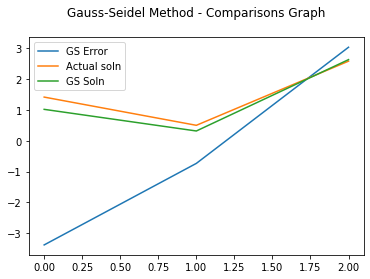

In [10]:
plt.title("Gauss-Seidel Method - Comparisons Graph\n")
plt.plot(GS_error, label='GS Error')
plt.plot(solve(A,b), label='Actual soln')
plt.plot(GS_soln, label='GS Soln')
plt.legend()



		  Side by Side Comparison


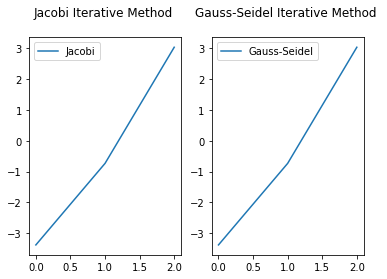

In [11]:
print("\n\n\t\t  Side by Side Comparison")
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(jacobi_error, label='Jacobi')
ax2.plot(GS_error, label='Gauss-Seidel')
ax1.set_title('Jacobi Iterative Method \n')
ax1.legend()
ax2.set_title('Gauss-Seidel Iterative Method \n')
ax2.legend()
plt.show()